In [152]:
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image
import seaborn as sns
from scipy import linalg
from sklearn.decomposition import TruncatedSVD
from sklearn.utils.extmath import randomized_svd
from numpy import array
from numpy import diag
from numpy import zeros
from scipy.linalg import svd
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from scipy import stats

In [2]:
gene_rpkm=pd.read_csv("/Users/markomiholjcic/Documents/GitHub/DataScienceBME6900Project/alan brain atlas data/mouse visual cortex cellular taxonomy/genes_rpkm.csv")
gene_rpkm=gene_rpkm.transpose()
gene_rpkm.shape

(1680, 24057)

In [ ]:
gene_rpkm=pd.read_csv(r"C:\Users\austi\Documents\GitHub\DataScienceBME6900Project\alan brain atlas data\mouse visual cortex cellular taxonomy\genes_rpkm.csv")
gene_rpkm=gene_rpkm.transpose()
gene_rpkm.shape

In [ ]:
gene_rpkm.head()

In [3]:
new_header = gene_rpkm.iloc[0]
gene_rpkm = gene_rpkm[1:]
gene_rpkm.columns = new_header
gene_rpkm

Unnamed: 0,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,mt_DQ540229,mt_DQ719271,mt_DQ719488,mt_DQ725839,mt_EF437370,mt_FR668231,mt_FW313083,mt_GU332589,mt_X57779,mt_X57780
A01101401,0,76.13,0.05,0,0,0,0,0,0,0.09,...,0,0,0,0,0,0,0,1401.76,242.94,242.94
A01101402,0,512.73,10.11,0,0,146.61,0,0,0,0,...,0,0,0,0,0,0,0,1397.16,539.54,539.54
A01101403,0,172.75,0,0,0,23.65,0,0,0,72.72,...,0,0,0,0,0,0,0,332.88,341.45,341.45
A01101404,0,170.56,0.02,0,0,117.6,0,0,0,125.81,...,0,0,0,0,0,0,0,1442.66,260.02,260.02
A01101405,0,113.87,0.04,0,0,180.93,0,0,0,0.1,...,0,0,0,0,0,0,0,749.68,348.1,348.1
A01101406,0,10.9,0.06,0,0,219.01,1.63,0,0,0.1,...,0,0,0,0,0,0,0,729.64,458.86,458.86
A01101407,0,191.23,70.19,0,0.53,134.03,6.35,0,0,200.77,...,0,0,0,0,0,0,0,746.42,336.74,336.74
A01101408,0,67.41,1.82,0,0,118.29,0,0,0,68.43,...,0,0,0,0,0,0,0,799.18,447.15,447.15
A02271433,0,70.56,0,0,0,60.55,0,0,0,0,...,0,0,0,0,0,0,0,1363.71,524.27,524.27
A02271434,0,73.35,20.88,0,0,122.69,46.68,0,0,177.3,...,0,0,0,0,0,0,0,1138.54,723.63,723.63


In [ ]:
cellmeta=pd.read_csv(r"C:\Users\austi\Documents\GitHub\DataScienceBME6900Project\alan brain atlas data\mouse visual cortex cellular taxonomy\cell_metadata.csv")
cellmeta.shape

In [4]:
cellmeta=pd.read_csv("/Users/markomiholjcic/Documents/GitHub/DataScienceBME6900Project/alan brain atlas data/mouse visual cortex cellular taxonomy/cell_metadata.csv")
cellmeta.shape

(1679, 16)

In [6]:
excitatory_meta=cellmeta.loc[cellmeta['major_class']=='Excitatory']
Excitatory_cells=excitatory_meta['long_name']
Excitatory_cells


2        A01101403
5        A01101406
6        A01101407
7        A01101408
8        A02271433
9        A02271434
11       A02271436
13       A02271438
22       A12101407
26       A12101411
29       A12101414
30       A12101415
31       A12101416
32       A12101417
38       A12101423
41       A12101426
44       A12101429
46       A12101431
50       A12101435
64       B06061401
65       B06061402
66       B06061403
67       B06061404
68       B06061405
69       B06061406
70       B06061408
71       B06061409
72       B06061410
73       B06061411
74       B06061412
           ...    
1390     T07011424
1391    T08211401n
1392    T08211402n
1395    T08211405n
1398    T08211408n
1402    T08211413n
1403    T08211414n
1404    T10011401n
1405    T10011402n
1406    T10011403n
1407    T10011404n
1408    T10021422n
1411     T13120917
1412     T13120918
1413     T13120919
1415    Tc02061502
1416    Tc02061503
1451     U11031439
1454     U11051403
1455     U11051404
1458     U11051407
1459     U11

In [7]:
excitatory_gene_rpkm=gene_rpkm.loc[Excitatory_cells]
excitatory_gene_rpkm.head()
avg=excitatory_gene_rpkm.mean()
minimum=excitatory_gene_rpkm.min()
maximum=excitatory_gene_rpkm.max()

print(minimum.min())
print(maximum.max())
print(avg.mean())

0.0
25780.07
19.742181147486345


In [8]:
#excitatory_gene_rpkm
#excitatory_gene_rpkm = excitatory_gene_rpkm.loc[:, (excitatory_gene_rpkm != 0).any(axis=0)]

#excitatory_gene_rpkm

In [9]:
excitatory_gene_rpkm = excitatory_gene_rpkm.apply(pd.to_numeric)
excitatory_gene_rpkm.dtypes

Unnamed: 0
0610005C13Rik    float64
0610007C21Rik    float64
0610007L01Rik    float64
0610007N19Rik    float64
0610007P08Rik    float64
0610007P14Rik    float64
0610007P22Rik    float64
0610008F07Rik    float64
0610009B14Rik    float64
0610009B22Rik    float64
0610009D07Rik    float64
0610009L18Rik    float64
0610009O20Rik    float64
0610010B08Rik    float64
0610010F05Rik    float64
0610010K14Rik    float64
0610010O12Rik    float64
0610011F06Rik    float64
0610011L14Rik    float64
0610012G03Rik    float64
0610012H03Rik    float64
0610030E20Rik    float64
0610031J06Rik    float64
0610031O16Rik    float64
0610037L13Rik    float64
0610037P05Rik    float64
0610038B21Rik    float64
0610038L08Rik    float64
0610039K10Rik    float64
0610040B10Rik    float64
                  ...   
mt_AK166684      float64
mt_AK166798      float64
mt_AK166978      float64
mt_AK167037      float64
mt_AK167184      float64
mt_AK201028      float64
mt_AK214359      float64
mt_BC004586      float64
mt_BC006023   

In [10]:
excitatory_gene_rpkm_matrix = excitatory_gene_rpkm.to_numpy()
excitatory_gene_rpkm_matrix

array([[0.00000e+00, 1.72750e+02, 0.00000e+00, ..., 3.32880e+02,
        3.41450e+02, 3.41450e+02],
       [0.00000e+00, 1.09000e+01, 6.00000e-02, ..., 7.29640e+02,
        4.58860e+02, 4.58860e+02],
       [0.00000e+00, 1.91230e+02, 7.01900e+01, ..., 7.46420e+02,
        3.36740e+02, 3.36740e+02],
       ...,
       [0.00000e+00, 9.92700e+01, 0.00000e+00, ..., 1.45625e+03,
        4.00310e+02, 4.00310e+02],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 9.42730e+02,
        7.43950e+02, 7.43950e+02],
       [0.00000e+00, 1.70000e-01, 2.40000e-01, ..., 1.44744e+03,
        5.76540e+02, 5.76540e+02]])

In [11]:
excitatory_gene_rpkm_matrix.shape

(756, 24057)

In [12]:
excitatory_gene_rpkm_matrix.dtype
excitatory_gene_rpkm_matrix = np.transpose(excitatory_gene_rpkm_matrix)
excitatory_gene_rpkm_matrix.shape

(24057, 756)

In [13]:
bR = ('Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red')
newcmap = LinearSegmentedColormap.from_list("mycmap", bR)

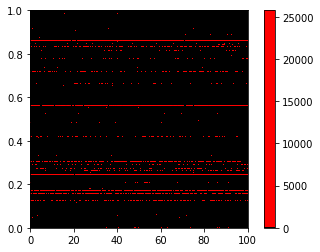

In [14]:
img = plt.imshow(excitatory_gene_rpkm_matrix, cmap=newcmap, 
                 extent=[0,100,0,1], aspect=100)

plt.colorbar(img, cmap=newcmap)

In [15]:
#SVD
U, s, vT = svd(excitatory_gene_rpkm_matrix)

count = 0 

for i in range(len(s)):
    if s[i] < 0.00001:
        count = count + 1

rank = excitatory_gene_rpkm_matrix.shape[1] - count
rank

756

In [ ]:
U.shape

In [ ]:
test = U.dot(np.transpose(U))

identity_matrix = np.identity(len(U[:,1]))

np.allclose(test, identity_matrix, atol=1e-8)

In [ ]:
vT.shape

In [ ]:
test = vT.dot(np.transpose(vT))

identity_matrix = np.identity(len(vT[:,1]))

np.allclose(test, identity_matrix, atol=1e-08)

In [16]:
U, s, VT = svd(excitatory_gene_rpkm_matrix)

U = U[:, :rank]

sigma = diag(s)

sigma = sigma[:rank, :rank]
VT = VT[:rank, :]

In [ ]:
U.shape

In [ ]:
sigma.shape

In [ ]:
VT.shape

In [ ]:
uDotS = U.dot(sigma)
uDotSDotVt = uDotS.dot(VT)

testSVD = np.round(abs(excitatory_gene_rpkm_matrix - uDotSDotVt))
testSVD = np.matrix(testSVD)
if (testSVD.all() == 0):
    zero = True
zero

In [ ]:
print(np.max(U))
print(np.min(U))
print(np.mean(U))

In [ ]:
gBR = ('Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen',
       'Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red','Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red')
gBRmap = LinearSegmentedColormap.from_list("mycmap", gBR)

In [ ]:
img = plt.imshow(U, cmap=gBRmap, extent=[0,100,0,1], aspect=100)

plt.title("U")
plt.colorbar(img, cmap=gBRmap)

In [ ]:
gBR2 = ('Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
        'Lawngreen','Lawngreen','Lawngreen',
       'Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red','Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red','Red')
gBRmap2 = LinearSegmentedColormap.from_list("mycmap", gBR2)

In [ ]:
img = plt.imshow(VT, cmap=gBRmap2, extent=[0,10,0,1], aspect=10)

plt.title('V Transpose')
plt.colorbar(img, cmap=gBRmap2)

In [ ]:
print(np.min(VT))
print(np.max(VT))
print(np.mean(VT))

In [ ]:
rBr = ('Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red')
sigmap = LinearSegmentedColormap.from_list("sigmap", rBr)

In [ ]:
plt.figure(figsize=(10,10))
img = plt.imshow(sigma, cmap=sigmap, extent=[0,100,0,1], aspect=100)

plt.title('Sigma')
plt.colorbar(img, cmap=sigmap)

In [17]:
print(np.min(sigma))
print(np.max(sigma))
print(np.mean(sigma))

0.0
559035.9163465023
7.275626366396765


In [18]:
diagonal = diag(sigma)

sort_diag = np.sort(diagonal)
sort_diag=sort_diag[::-1]

np.allclose(sort_diag, diagonal)

True

In [19]:
sigma

array([[559035.9163465 ,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,  81137.46026951,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,      0.        ,  76035.01393244, ...,
             0.        ,      0.        ,      0.        ],
       ...,
       [     0.        ,      0.        ,      0.        , ...,
          1636.47541985,      0.        ,      0.        ],
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,   1538.49335353,      0.        ],
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,    955.93100393]])

In [20]:
d_sig=diag(sigma)

count = 0
for m in range(len(d_sig)):
    if d_sig[m] < 7000:
        count = m
        break
        
sig=d_sig[:count]
denoise_sigma=np.diag(sig)
len(denoise_sigma)

88

In [21]:
dns_U=U[:,:len(denoise_sigma)]
dns_VT=VT[:len(denoise_sigma),:]


In [22]:
dns_uDotS = dns_U.dot(denoise_sigma)
dns_uDotSDotVt = dns_uDotS.dot(dns_VT)


In [23]:
bR = ('Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red')
newcmap = LinearSegmentedColormap.from_list("mycmap", bR)

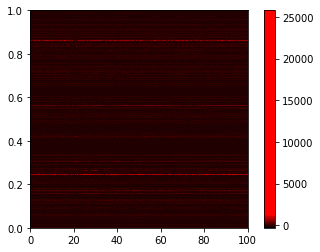

In [24]:
img = plt.imshow(dns_uDotSDotVt, cmap=newcmap, 
                 extent=[0,100,0,1], aspect=100)

plt.colorbar(img, cmap=newcmap)

In [ ]:
plt.figure(figsize=(10,10))
img = plt.imshow(denoise_sigma, cmap=sigmap, extent=[0,100,0,1], aspect=100)

plt.title('Sigma')
plt.colorbar(img, cmap=sigmap)

In [ ]:
gBR3 = ('Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red','Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red','Red')
gBRmap3 = LinearSegmentedColormap.from_list("mycmap", gBR3)

In [ ]:
img = plt.imshow(dns_VT, cmap=gBRmap3, extent=[0,10,0,1], aspect=10)

plt.title('V Transpose')
plt.colorbar(img, cmap=gBRmap3)

In [ ]:
img = plt.imshow(dns_U, cmap=gBRmap, extent=[0,100,0,1], aspect=100)

plt.title("U")
plt.colorbar(img, cmap=gBRmap)

In [114]:
L1_meta=excitatory_meta.loc[excitatory_meta['layer_dissectoin']=='L1']

L23_meta=excitatory_meta.loc[excitatory_meta['layer_dissectoin']=='L2/3']

L4_meta=excitatory_meta.loc[excitatory_meta['layer_dissectoin']=='L4']

L5_meta=excitatory_meta.loc[excitatory_meta['layer_dissectoin']=='L5']

L6_meta=excitatory_meta.loc[excitatory_meta['layer_dissectoin']=='L6']

#All_meta=excitatory_meta.loc[excitatory_meta['layer_dissectoin']=='All']

#upper_meta=excitatory_meta.loc[excitatory_meta['layer_dissectoin']=='upper']

#lower_meta=excitatory_meta.loc[excitatory_meta['layer_dissectoin']=='lower']

layer_group = pd.DataFrame()

layer_group = L1_meta.append(L23_meta)
layer_group = layer_group.append(L4_meta)
layer_group = layer_group.append(L5_meta)
layer_group = layer_group.append(L6_meta)
#layer_group = layer_group.append(All_meta)
#layer_group = layer_group.append(upper_meta)
#layer_group = layer_group.append(lower_meta)
layer_group

,long_name,cre,collection_date,sequencing_type,total_reads,all_mapped_percent,mRNA_percent,genome_percent,ercc_percent,tdt_permillion,major_class,sub_class,major_dissection,layer_dissectoin,color_code,short_name
356,F08211421,Scnn1a-Tg2 Neg,7/15/2014,hiseq_090214,14571464,90.27,46.80,38.23,1.15,0.3,Excitatory,L2/3,V1,L1,39,F1191_V1
361,F08211426,Scnn1a-Tg2 Neg,7/15/2014,hiseq_090214,16950503,90.66,47.26,38.19,0.84,0.0,Excitatory,L2/3,V1,L1,39,F1196_V1
362,F08211427,Scnn1a-Tg2 Neg,7/15/2014,hiseq_090214,14269546,91.03,50.05,35.84,0.85,0.1,Excitatory,L2/3,V1,L1,39,F1197_V1
364,F08211429,Scnn1a-Tg2 Neg,7/15/2014,hiseq_090214,9762996,91.06,50.91,34.72,1.23,5.1,Excitatory,L2/3,V1,L1,39,F1199_V1
825,Nd02061513n,Ndnf Neg,11/7/2014,hiseq_020915,9555981,91.73,49.26,36.66,1.03,27.6,Excitatory,L2/3,V1,L1,26,Nd1960n_V1
830,Nd02061518n,Ndnf Neg,11/7/2014,hiseq_020915,9378690,91.19,50.09,34.98,1.11,5.0,Excitatory,L2/3,V1,L1,26,Nd1965n_V1
831,Nd02061519n,Ndnf Neg,11/7/2014,hiseq_020915,8163421,91.56,47.42,38.20,1.63,6.0,Excitatory,L2/3,V1,L1,26,Nd1966n_V1
133,C02061556n,Cux2 Neg,11/10/2014,hiseq_020915,6624326,92.16,51.41,33.88,1.16,3.2,Excitatory,L2/3,V1,L2/3,80,C2003n_V23
139,C02061562n,Cux2 Neg,11/10/2014,hiseq_020915,11702797,92.60,52.44,33.53,1.26,6.8,Excitatory,L2/3,V1,L2/3,80,C2009n_V23
181,C07211401,Cux2,6/9/2014,hiseq_073014,15448011,94.03,44.21,45.04,0.76,125.7,Excitatory,L2/3,V1,L2/3,1,C958_V23


In [115]:
L1_index = L1_meta.index
L1_length = len(L1_index) - 1
print("L1 is from 0-", L1_length, "index")

L23_index = L23_meta.index
L23_length = len(L23_index)
L23_max_index = L1_length + L23_length
print("L2 is from:", L1_length+1, "-", L23_max_index)

L4_index = L4_meta.index
L4_length = len(L4_index)
L4_max_index = L23_max_index + L4_length
print("L4 is from:", L23_max_index+1, "-", L4_max_index)

L5_index = L5_meta.index
L5_length = len(L5_index)
L5_max_index = L4_max_index + L5_length
print("L5 is from:", L4_max_index+1, "-", L5_max_index)

L6_index = L6_meta.index
L6_length = len(L6_index)
L6_max_index = L5_max_index + L6_length
print("L6 is from:", L5_max_index+1, "-", L6_max_index)

#All_index = All_meta.index
#All_length = len(All_index)
#All_max_index = L6_max_index + All_length
#print("Allmeta is from", L6_max_index+1, "-", All_max_index)

#upper_index = upper_meta.index
#upper_length = len(upper_index)
#upper_max_index = All_max_index + upper_length
#print("Uppermeta is from", All_max_index+1, "-", upper_max_index)

#lower_index = lower_meta.index
#lower_length = len(lower_index)
#lower_max_index = upper_max_index + lower_length
#print("Lowermeta is from", upper_max_index+1, "-", lower_max_index)


L1 is from 0- 6 index
L2 is from: 7 - 54
L4 is from: 55 - 256
L5 is from: 257 - 372
L6 is from: 373 - 384


In [116]:
excitatory_gene_rpkm_layer=gene_rpkm.loc[layer_group["long_name"]]

avg=excitatory_gene_rpkm_layer.mean()
minimum=excitatory_gene_rpkm_layer.min()
maximum=excitatory_gene_rpkm_layer.max()

print(minimum.min())
print(maximum.max())
print(avg.mean())

0.0
25780.07
19.504626944988367


In [117]:
excitatory_gene_rpkm_layer = excitatory_gene_rpkm_layer.apply(pd.to_numeric)
excitatory_gene_rpkm_layer.dtypes

Unnamed: 0
0610005C13Rik    float64
0610007C21Rik    float64
0610007L01Rik    float64
0610007N19Rik    float64
0610007P08Rik    float64
0610007P14Rik    float64
0610007P22Rik    float64
0610008F07Rik    float64
0610009B14Rik    float64
0610009B22Rik    float64
0610009D07Rik    float64
0610009L18Rik    float64
0610009O20Rik    float64
0610010B08Rik    float64
0610010F05Rik    float64
0610010K14Rik    float64
0610010O12Rik    float64
0610011F06Rik    float64
0610011L14Rik    float64
0610012G03Rik    float64
0610012H03Rik    float64
0610030E20Rik    float64
0610031J06Rik    float64
0610031O16Rik    float64
0610037L13Rik    float64
0610037P05Rik    float64
0610038B21Rik    float64
0610038L08Rik    float64
0610039K10Rik    float64
0610040B10Rik    float64
                  ...   
mt_AK166684      float64
mt_AK166798      float64
mt_AK166978      float64
mt_AK167037      float64
mt_AK167184      float64
mt_AK201028      float64
mt_AK214359      float64
mt_BC004586      float64
mt_BC006023   

In [118]:
excitatory_gene_rpkm_matrix_layer = excitatory_gene_rpkm_layer.to_numpy()
excitatory_gene_rpkm_matrix_layer

array([[0.00000e+00, 5.80000e-01, 4.00000e-02, ..., 7.44050e+02,
        5.42620e+02, 5.42620e+02],
       [0.00000e+00, 1.10340e+02, 4.36900e+01, ..., 7.55660e+02,
        6.06240e+02, 6.06240e+02],
       [0.00000e+00, 4.71800e+01, 3.50700e+01, ..., 6.65960e+02,
        5.47040e+02, 5.47040e+02],
       ...,
       [0.00000e+00, 4.54900e+01, 0.00000e+00, ..., 9.59640e+02,
        6.64220e+02, 6.64220e+02],
       [0.00000e+00, 1.34470e+02, 2.16100e+01, ..., 1.08803e+03,
        3.29800e+02, 3.29800e+02],
       [0.00000e+00, 3.42700e+01, 0.00000e+00, ..., 1.38194e+03,
        6.81820e+02, 6.81820e+02]])

In [119]:
excitatory_gene_rpkm_matrix_layer.shape

(385, 24057)

In [120]:
excitatory_gene_rpkm_matrix_layer = np.transpose(excitatory_gene_rpkm_matrix_layer)
excitatory_gene_rpkm_matrix_layer.shape

(24057, 385)

In [121]:
bR = ('Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red')
newcmap = LinearSegmentedColormap.from_list("mycmap", bR)

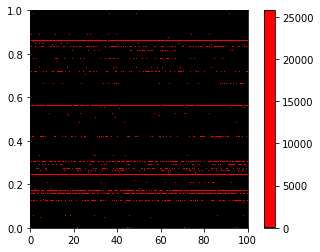

In [122]:
img = plt.imshow(excitatory_gene_rpkm_matrix_layer, cmap=newcmap, 
                 extent=[0,100,0,1], aspect=100)

plt.colorbar(img, cmap=newcmap)

In [123]:
#SVD
U, s, vT = svd(excitatory_gene_rpkm_matrix_layer)

count = 0 

for i in range(len(s)):
    if s[i] < 0.00001:
        count = count + 1

rank = excitatory_gene_rpkm_matrix_layer.shape[1] - count
rank

385

In [124]:
U, s, VT = svd(excitatory_gene_rpkm_matrix_layer)

U = U[:, :rank]

sigma = diag(s)

sigma = sigma[:rank, :rank]
VT = VT[:rank, :]

In [125]:
gBR2 = ('Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
        'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
        'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
        'Lawngreen',
       'Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red','Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red','Red')
gBRmap2 = LinearSegmentedColormap.from_list("mycmap", gBR2)

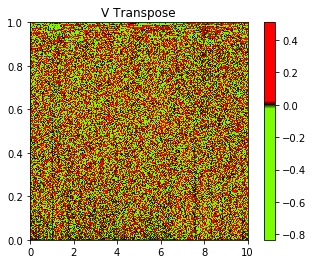

In [126]:
img = plt.imshow(VT, cmap=gBRmap2, extent=[0,10,0,1], aspect=10)

plt.title('V Transpose')
plt.colorbar(img, cmap=gBRmap2)

In [127]:
VT.shape

(385, 385)

In [128]:
sigma.shape

(385, 385)

In [129]:
rBr = ('Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red')
sigmap = LinearSegmentedColormap.from_list("sigmap", rBr)

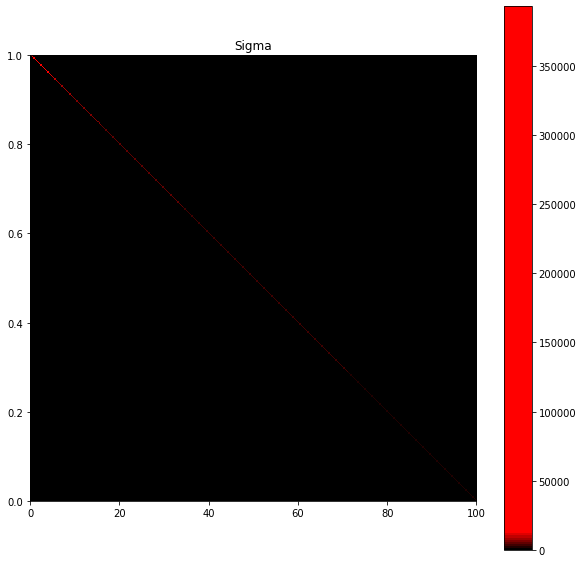

In [130]:
plt.figure(figsize=(10,10))
img = plt.imshow(sigma, cmap=sigmap, extent=[0,100,0,1], aspect=100)

plt.title('Sigma')
plt.colorbar(img, cmap=sigmap)

In [131]:
diag(sigma)

array([393147.25145587,  63775.65699502,  50755.68824459,  33846.74361887,
        32467.1107376 ,  28296.02972111,  25267.70700046,  22378.31378193,
        19665.94610431,  18340.13219251,  17762.08237198,  16884.58382846,
        15707.13734084,  14510.85197211,  13557.06796449,  12950.37853761,
        12751.83856306,  11384.5803709 ,  10834.96248779,  10560.83466773,
        10131.24310649,   9981.25857231,   9768.90516433,   9144.48824847,
         9053.76573204,   8961.96840821,   8889.8105662 ,   8581.42634886,
         8518.83896733,   8368.97624993,   8246.36546802,   8185.7834809 ,
         8112.82213742,   7911.17142581,   7837.53986863,   7679.2061462 ,
         7591.12533885,   7583.50592814,   7439.02816425,   7364.64709422,
         7271.35806077,   7241.9822965 ,   7148.87916862,   7020.11171796,
         6968.10605417,   6868.00878243,   6821.14867979,   6752.18818533,
         6719.74227139,   6658.67178534,   6646.58885869,   6557.91822705,
         6520.45328113,  

In [133]:
d_sig=diag(sigma)

count = 0
for m in range(len(d_sig)):
    if d_sig[m] < 50000:
        count = m
        break
        
sig=d_sig[:count]
denoise_sigma=np.diag(sig)
len(denoise_sigma)

3

In [134]:
dns_U=U[:,:len(denoise_sigma)]
dns_VT=VT[:len(denoise_sigma),:]

In [135]:
dns_uDotS = dns_U.dot(denoise_sigma)
dns_uDotSDotVt = dns_uDotS.dot(dns_VT)

In [136]:
bR = ('Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red')
newcmap = LinearSegmentedColormap.from_list("mycmap", bR)

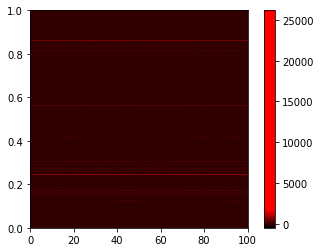

In [137]:
img = plt.imshow(dns_uDotSDotVt, cmap=newcmap, 
                 extent=[0,100,0,1], aspect=100)

plt.colorbar(img, cmap=newcmap)

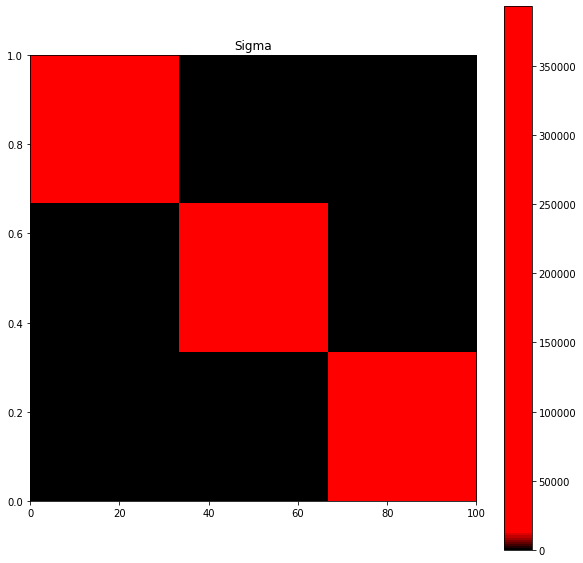

In [138]:
plt.figure(figsize=(10,10))
img = plt.imshow(denoise_sigma, cmap=sigmap, extent=[0,100,0,1], aspect=100)

plt.title('Sigma')
plt.colorbar(img, cmap=sigmap)

In [147]:
gBR3 = ('Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen',
       'Lawngreen',
       'Black', 'Red', 'Red','Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red','Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red','Red')
gBRmap3 = LinearSegmentedColormap.from_list("mycmap", gBR3)

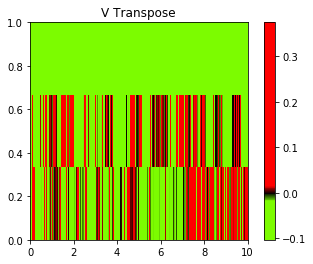

In [148]:
img = plt.imshow(dns_VT, cmap=gBRmap3, extent=[0,10,0,1], aspect=10)

plt.title('V Transpose')
plt.colorbar(img, cmap=gBRmap3)

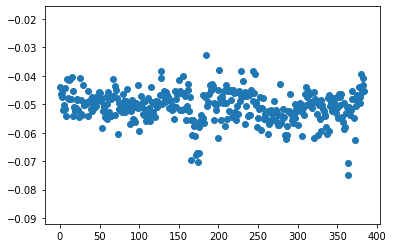

In [149]:
v1 = VT[0,:]
v1x = np.arange(0,VT.shape[0],1)
plt.scatter(v1x,v1)

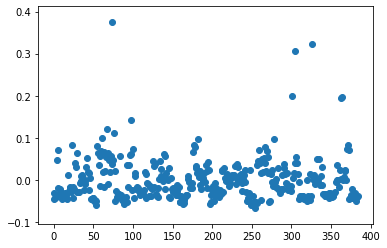

In [150]:
v2 = VT[1,:]
v2x = np.arange(0,VT.shape[0],1)
plt.scatter(v2x,v2)

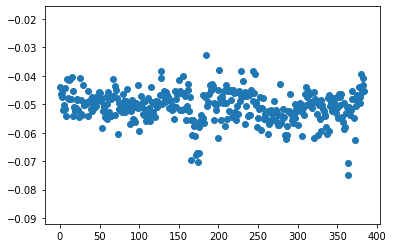

In [151]:
v3 = VT[0,:]
v3x = np.arange(0,VT.shape[0],1)
plt.scatter(v3x,v3)

In [159]:
L1 = v1[0:5]
L2 = v1[7:54]
L4 = v1[55:256]
L5 = v1[257:372]
L6 = v1[373:384]


stats.kruskal(L1,L2,L3,L4,L6)

KruskalResult(statistic=10.470210210394601, pvalue=0.03320981982545083)